# 1. Import Libraries

In [32]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import eda_helper_functions as eda



# 2. Training data

In [3]:
file_path = r"E:\1. Projects\ML-internship\customer-churn-prediction\Research\data\train.csv"

train = pd.read_csv(file_path)

In [4]:
train

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,9470,15674573,Gearhart,713,France,Female,25.0,4,121172.97,1,1.0,1.0,56268.98,0
1,4798,15666173,Chidumaga,793,Germany,Female,32.0,1,96408.98,1,1.0,1.0,138191.81,0
2,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1.0,0.0,157333.69,1
3,9466,15815259,Fang,835,France,Female,56.0,2,0.00,2,1.0,1.0,39820.13,0
4,4147,15698246,Gordon,658,France,Female,24.0,2,0.00,2,1.0,1.0,84694.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,6849,15634628,Brown,579,France,Female,33.0,1,65667.79,2,0.0,0.0,164608.98,0
6392,3674,15606915,Genovese,764,France,Male,24.0,7,98148.61,1,1.0,0.0,26843.76,0
6393,2548,15634772,Mario,682,Spain,Female,59.0,0,122661.39,1,0.0,1.0,84803.76,0
6394,8313,15609977,Mundy,587,France,Male,47.0,6,71026.77,1,1.0,0.0,57962.41,0


In [5]:
# Some high level summary

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        6396 non-null   int64  
 1   customerid       6396 non-null   int64  
 2   surname          6396 non-null   object 
 3   creditscore      6396 non-null   int64  
 4   geography        6396 non-null   object 
 5   gender           6396 non-null   object 
 6   age              6396 non-null   float64
 7   tenure           6396 non-null   int64  
 8   balance          6396 non-null   float64
 9   numofproducts    6396 non-null   int64  
 10  hascrcard        6396 non-null   float64
 11  isactivemember   6396 non-null   float64
 12  estimatedsalary  6396 non-null   float64
 13  exited           6396 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 699.7+ KB


In [6]:
train.describe(include = "number")

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,6396.000000,6.396000e+03,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000
mean,5049.171513,1.568977e+07,650.361007,38.772670,5.016573,76688.273393,1.532989,0.709506,0.518293,100469.555910,0.204972
std,2890.386559,7.172755e+04,96.236350,10.431634,2.891638,62498.685799,0.584667,0.454026,0.499704,57777.662178,0.403713
min,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2543.750000,1.562742e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50691.817500,0.000000
50%,5079.000000,1.568840e+07,652.000000,37.000000,5.000000,97334.690000,1.000000,1.000000,1.000000,100839.505000,0.000000
75%,7561.250000,1.575251e+07,717.000000,44.000000,7.000000,127811.165000,2.000000,1.000000,1.000000,150456.142500,0.000000
max,9998.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
train.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,9470,15674573,Gearhart,713,France,Female,25.0,4,121172.97,1,1.0,1.0,56268.98,0
1,4798,15666173,Chidumaga,793,Germany,Female,32.0,1,96408.98,1,1.0,1.0,138191.81,0
2,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1.0,0.0,157333.69,1
3,9466,15815259,Fang,835,France,Female,56.0,2,0.00,2,1.0,1.0,39820.13,0
4,4147,15698246,Gordon,658,France,Female,24.0,2,0.00,2,1.0,1.0,84694.49,0


# Some univariate and bivariate analysis

In [8]:
num_col = ['rownumber', 'customerid', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'isactivemember', 'estimatedsalary']
cat_col = ['surname', 'geography', 'gender', 'hascrcard', 'exited']

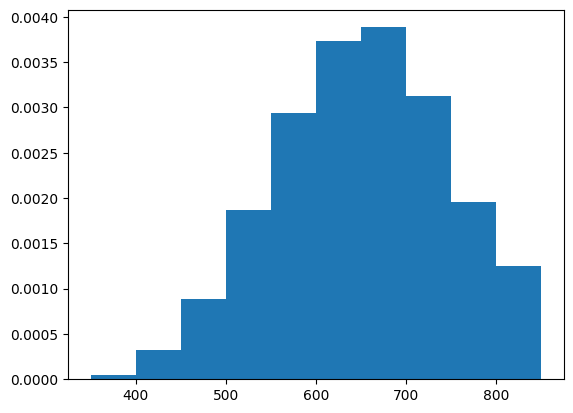

In [9]:
plt.hist(x = train['creditscore'], density = True)
plt.show()

In [10]:
train.creditscore.skew()

np.float64(-0.08895344902905206)

In [11]:
# Missing values

train.isna().sum() 

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

```implies no mising values'''

In [12]:
train.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,9470,15674573,Gearhart,713,France,Female,25.0,4,121172.97,1,1.0,1.0,56268.98,0
1,4798,15666173,Chidumaga,793,Germany,Female,32.0,1,96408.98,1,1.0,1.0,138191.81,0
2,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1.0,0.0,157333.69,1
3,9466,15815259,Fang,835,France,Female,56.0,2,0.00,2,1.0,1.0,39820.13,0
4,4147,15698246,Gordon,658,France,Female,24.0,2,0.00,2,1.0,1.0,84694.49,0


In [13]:
train.age

0       25.0
1       32.0
2       46.0
3       56.0
4       24.0
        ... 
6391    33.0
6392    24.0
6393    59.0
6394    47.0
6395    43.0
Name: age, Length: 6396, dtype: float64

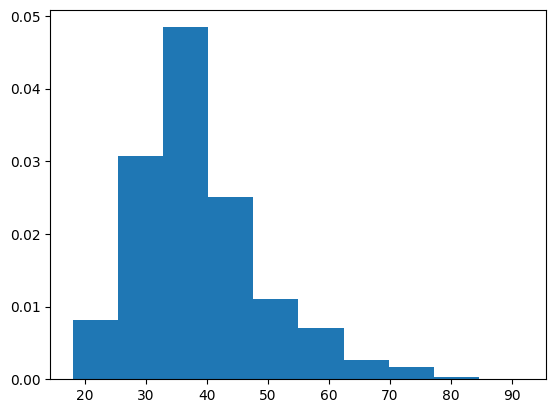

In [14]:
plt.hist(x = train['age'], density = True)
plt.show()

In [15]:
train.age.skew()

np.float64(1.0108839297103285)

In [18]:
train.age.value_counts(sorted)

age
38.0    0.048780
35.0    0.047530
37.0    0.047530
34.0    0.043621
36.0    0.043152
          ...   
82.0    0.000156
92.0    0.000156
85.0    0.000156
84.0    0.000156
79.0    0.000156
Name: proportion, Length: 69, dtype: float64

In [22]:
train.tenure.value_counts(sorted)

tenure
2     0.107098
7     0.105222
3     0.101470
8     0.101470
1     0.100688
5     0.100219
9     0.098030
6     0.097561
4     0.096936
10    0.049250
0     0.042058
Name: proportion, dtype: float64

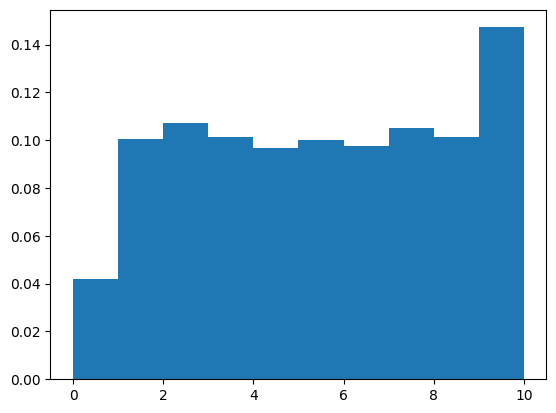

In [24]:
plt.hist(x = train.tenure, density = True)
plt.show()

In [25]:
train.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,9470,15674573,Gearhart,713,France,Female,25.0,4,121172.97,1,1.0,1.0,56268.98,0
1,4798,15666173,Chidumaga,793,Germany,Female,32.0,1,96408.98,1,1.0,1.0,138191.81,0
2,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1.0,0.0,157333.69,1
3,9466,15815259,Fang,835,France,Female,56.0,2,0.00,2,1.0,1.0,39820.13,0
4,4147,15698246,Gordon,658,France,Female,24.0,2,0.00,2,1.0,1.0,84694.49,0


In [26]:
train.balance

0       121172.97
1        96408.98
2            0.00
3            0.00
4            0.00
          ...    
6391     65667.79
6392     98148.61
6393    122661.39
6394     71026.77
6395    140080.32
Name: balance, Length: 6396, dtype: float64

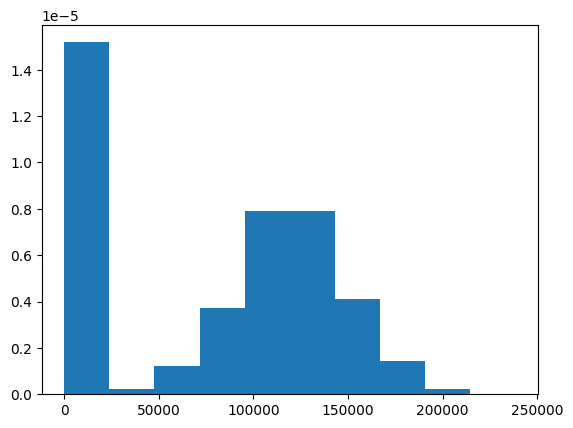

In [27]:
plt.hist(x = train.balance, density = True)
plt.show()

In [28]:
train.balance

0       121172.97
1        96408.98
2            0.00
3            0.00
4            0.00
          ...    
6391     65667.79
6392     98148.61
6393    122661.39
6394     71026.77
6395    140080.32
Name: balance, Length: 6396, dtype: float64

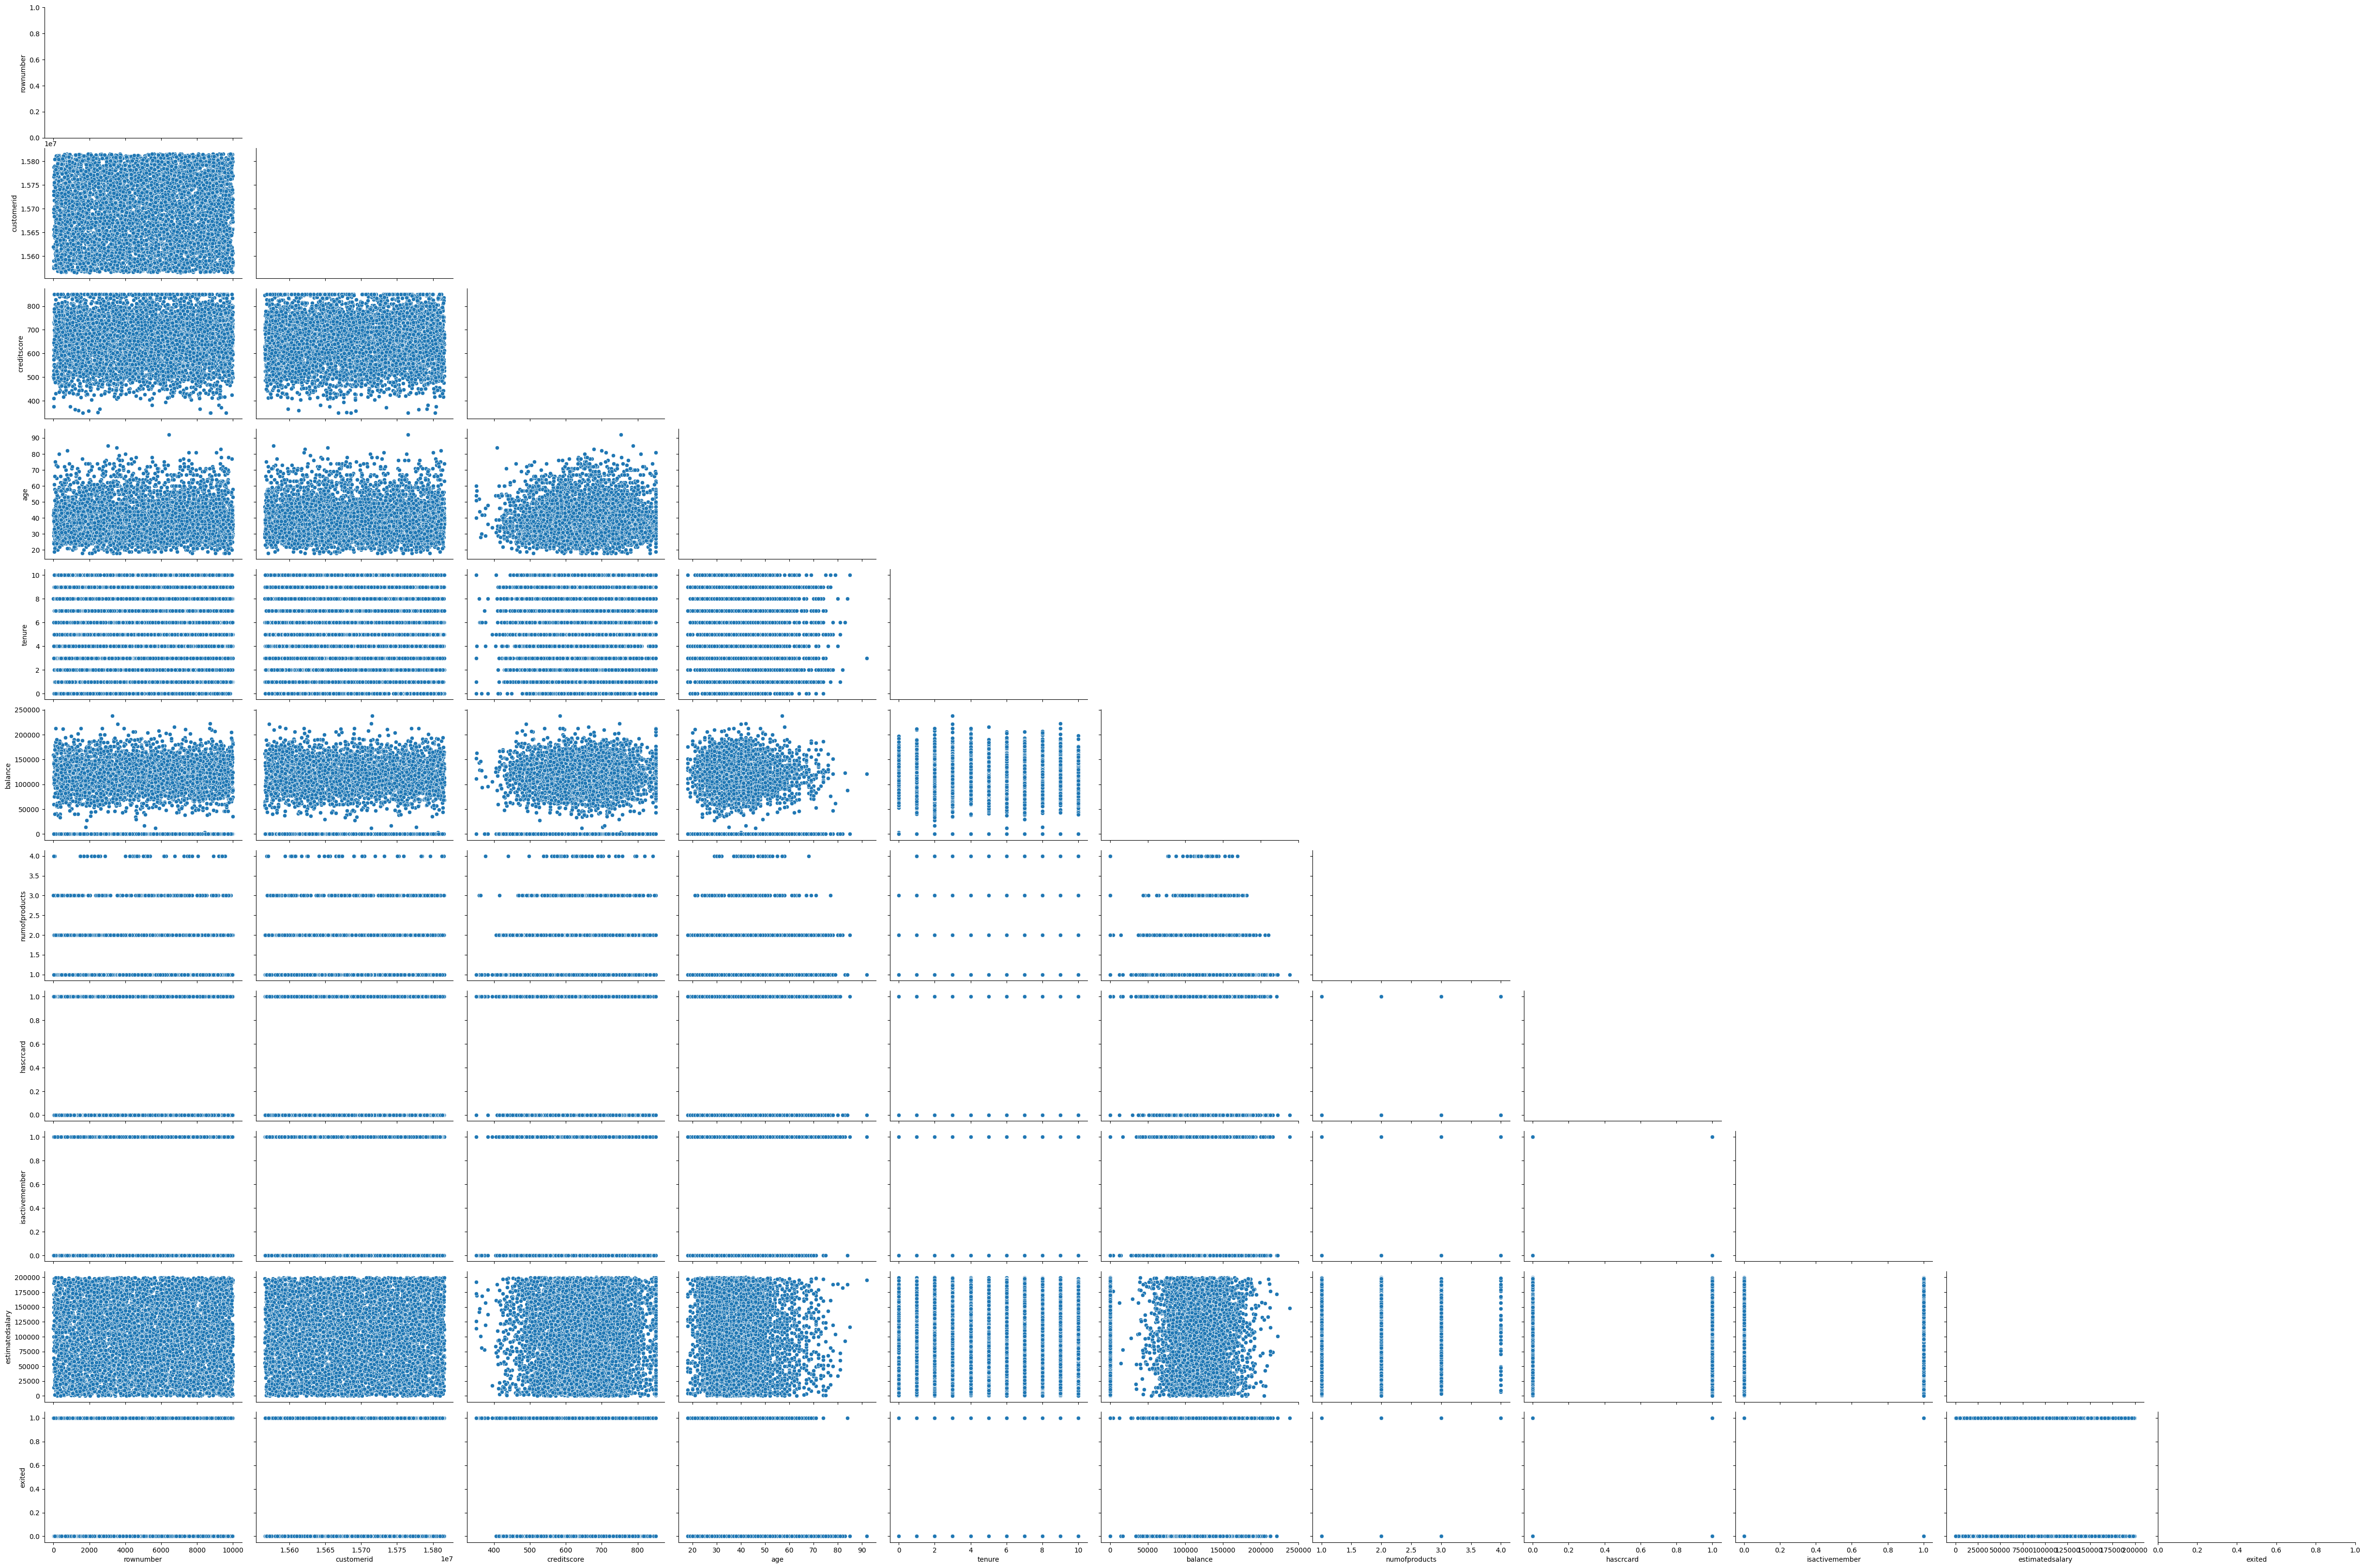

In [33]:
eda.pair_plots(train)

# Correlation analysis

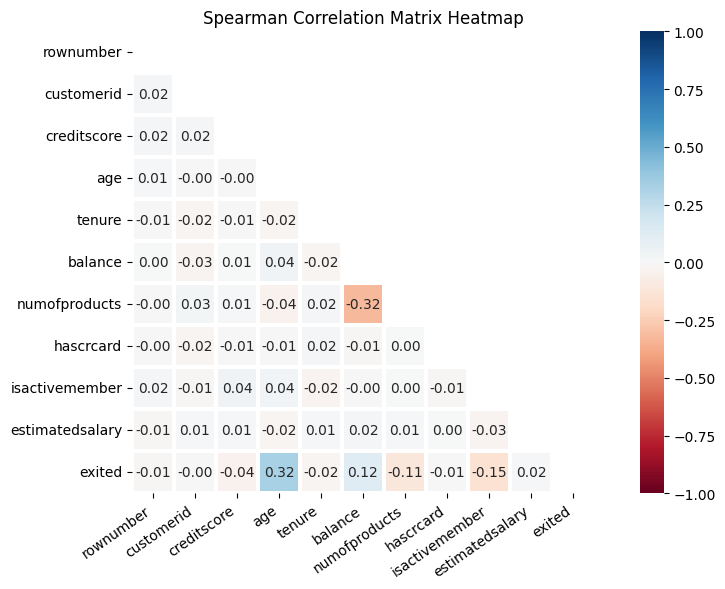

In [34]:
eda.correlation_heatmap(train)

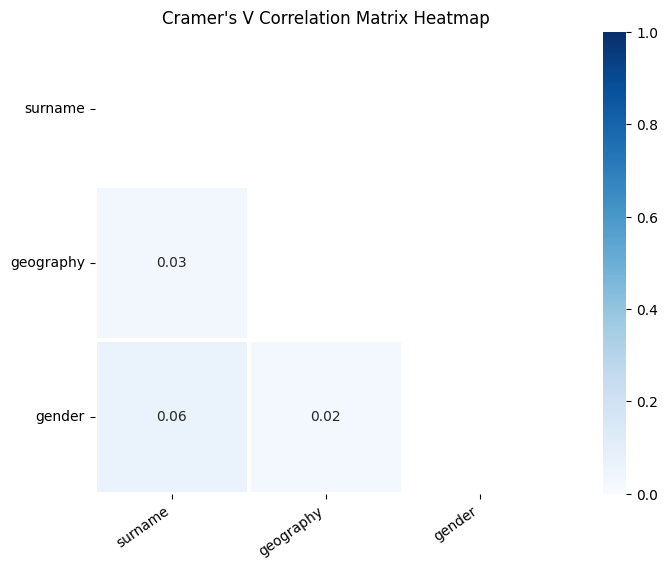

In [35]:
eda.cramersV_heatmap(train)

In [36]:
eda.cat_summary(train, 'gender')

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
6391    Female
6392      Male
6393    Female
6394      Male
6395      Male
Name: gender, Length: 6396, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,396 / 6,396 rows


,
count,6396
unique,2
top,Male
freq,3464


,count,percentage
category,,
Male,3464,0.541588
Female,2932,0.458412


In [37]:
train.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [38]:
eda.cat_summary(train, 'exited')

0       0
1       0
2       1
3       0
4       0
       ..
6391    0
6392    0
6393    0
6394    0
6395    1
Name: exited, Length: 6396, dtype: int64

Data Type      : int64
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,396 / 6,396 rows


,
count,6396.000000
mean,0.204972
std,0.403713
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,count,percentage
category,,
0,5085,0.795028
1,1311,0.204972


#### Imbalanced dataset here, we need to correct this

In [39]:
train.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,9470,15674573,Gearhart,713,France,Female,25.0,4,121172.97,1,1.0,1.0,56268.98,0
1,4798,15666173,Chidumaga,793,Germany,Female,32.0,1,96408.98,1,1.0,1.0,138191.81,0
2,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1.0,0.0,157333.69,1
3,9466,15815259,Fang,835,France,Female,56.0,2,0.00,2,1.0,1.0,39820.13,0
4,4147,15698246,Gordon,658,France,Female,24.0,2,0.00,2,1.0,1.0,84694.49,0


In [41]:
train.hascrcard.value_counts()

hascrcard
1.0    4538
0.0    1858
Name: count, dtype: int64

In [42]:
train.isactivemember.value_counts()

isactivemember
1.0    3315
0.0    3081
Name: count, dtype: int64